### Exercise 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

---
### Population Dataset
Generate population dataset `X, y` of input-output examples for two purposes: 

1. **Risk computation:** Use `X, y` to compute the true risk $R(f)$ of a classifier $f$, where $x$ is the binary random variable with 

$$
x = \begin{cases}
1 &:& f(x) \neq y\\
0 &:& \text{otherwise}
\end{cases}
$$

2. **Sampling:** Sample the training and test sets from `X, y`.

In [3]:
N = int(1e5)
X, y = make_circles(N, noise=0.15, factor=0.2)

---
### Auxiliary Functions

In [4]:
def sample(n, rs=None):
    '''Samples a dataset of size n from the population X, y.

    Parameter:
      n   size of training set
      rs  random state 
    '''
    X_tr,_,y_tr,_ = train_test_split(X, y, train_size=n, random_state=rs)
    return X_tr, y_tr

def test_n(f, n, delta=0.05, n_runs = 30):
    ''' 
    Returns the empirical risks for all n_runs test sets of size n together with the average lower and upper bound. 

    Parameters:
    f        classifier
    n        size of test set
    delta    confidence parameter for 1 - delta
    n_runs   number of trials

    Return:
    Rn       array: empirical risks of f for each test set   
    lower    array: mean lower error bound over all test sets
    upper    array: mean upper error bound over all test sets
    '''

    # term for computing Hoeffding's error bounds
    bound = np.sqrt(-np.log(delta/2.) / (2 * n))

    Rn = np.zeros(n_runs)
    lower = np.zeros(n_runs)
    upper = np.zeros(n_runs)
    for i in range(n_runs):

        # test set 
        X_test, y_test = sample(n)

        # empirical risk on test set
        Rn[i] = 1. - f.score(X_test, y_test)

        # Hoeffding's error bound        
        lower[i] = Rn[i] - bound
        upper[i] = Rn[i] + bound

    return Rn, lower.mean(), upper.mean()

    
def test(f, delta=0.05, n_runs=100):
    '''
    Fits a classifier f to a dataset of size 100. Calls the test_n function for varying test set sizes. Returns results of test_n for each test set size and the sizes itself. 

    Parameters:
    f        classifier
    delta    confidence parameter for 1 - delta
    n_runs   number of trials

    Return:
    size     array: sizes n of test set
    R        double: true risk
    Rn       array: empirical risks of f for each size and test set   
    lower    array: mean lower error bound over all test sets for each size
    upper    array: mean upper error bound over all test sets for each size
    '''
    
    # size of test sets
    size = [10, 25, 50, 75, 100, 200, 400, 600, 800, 1000]
    
    # fix an arbitrary hypothesis f
    X_train, y_train = sample(100, rs=13)
    f.fit(X_train, y_train)

    # true risk R(f) 
    errors = f.predict(X) != y
    R = np.mean(errors)+np.zeros(len(size))

    Rn = np.zeros((len(size), n_runs))
    lower = np.zeros(len(size))
    upper = np.zeros(len(size))
    for i, n in enumerate(size):
        Rn[i], lower[i], upper[i] = test_n(f, n, delta, n_runs)
    return size, R, Rn, lower, upper

def plot(size, R, Rn, lower, upper):
    '''Plots the true risk (constant) and the mean error bounds. 
    
    Parameter:
    size     array: sizes n of test set
    R        double: true risk
    Rn       array: empirical risks of f for each size and test set   
    lower    array: mean lower error bound over all test sets for each size
    upper    array: mean upper error bound over all test sets for each size
    '''
    
    s = np.repeat(size, [len(rn) for rn in Rn])
    rn = np.concatenate(Rn)
    plt.scatter(s, rn, s=10, c='tab:red', edgecolors='w',)
    plt.plot(size, R, lw=2)
    plt.plot(size, lower, lw=1, c='tab:gray')
    plt.plot(size, upper, lw=1, c='tab:gray')
    plt.show()

---
### Logistic Regression

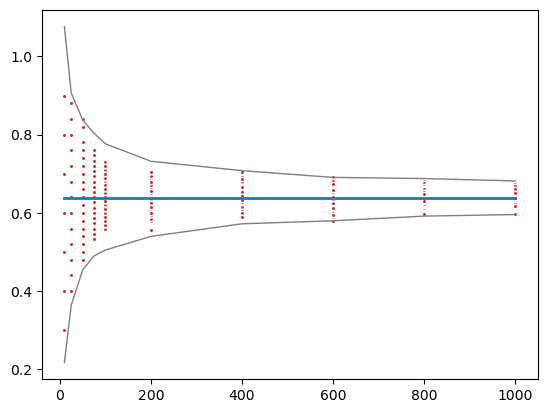

In [5]:
f = LogisticRegression(penalty=None)
size, R, Rn, lower, upper = test(f)
plot(size, R, Rn, lower, upper)

''' 
Legend:
+ blue line : R(f)
+ gray lines: mean lower and upper error bound
+ red dots: Rn(f) for different test sets
''';

### K-Nearest-Neighbor Classifier

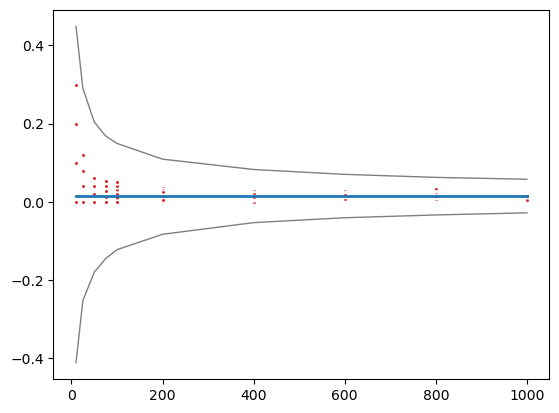

In [6]:
f = KNeighborsClassifier(1)
size, R, Rn, lower, upper = test(f)
plot(size, R, Rn, lower, upper)

---
### Decision Tree

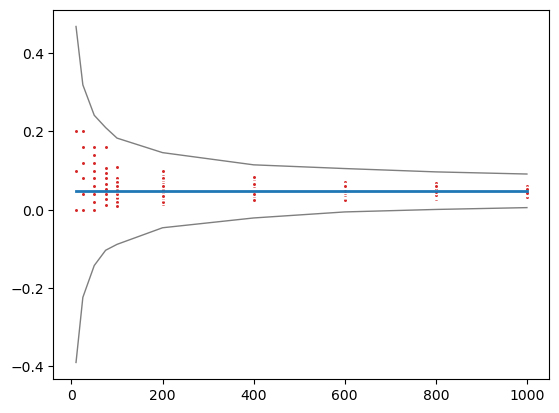

In [7]:
f = DecisionTreeClassifier(max_depth=5, random_state=13)
size, R, Rn, lower, upper = test(f)
plot(size, R, Rn, lower, upper)

---
### MLP

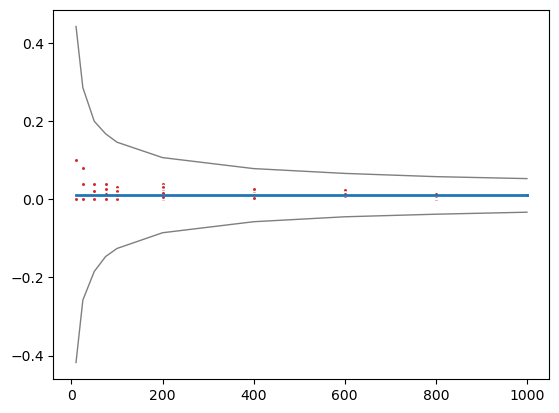

In [8]:
f = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=3000)
size, R, Rn, lower, upper = test(f)
plot(size, R, Rn, lower, upper)